# Amazon Music Instrument Review Sentiment Analysis

Classifies whether a review as positive, neutral, or negative.
These classes were created by taking the feature "rating", which is on a scale of 1-5.
* 1-2: Negative
* 3: Neutral
* 4-5: Positive

## The Approach
The models I plan to use include Naive Bayes, Random Forest, XGBoost, and a LSTM

I removed all features except for the rating (and changing the rating to my 3 custom classes) and combined the overall and summary features.

After normalizing, filtering stop words, and tokenizing, I debated what to do next and decided on experimenting on whether lemmatization of the words would provide more accuracy or not.

After either technique, I will put the text data through a Tf-idf vectorizor to them feed to my models.

Each model will have their parameters tuned with a grid search.

In [5]:
import pickle
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.style as style

with open('Data/pickles/results_dict_no_lemma', 'rb') as file:
    results_dict_no_lemma = pickle.load(file)

## Without Lemmatization

### Naive Bayes

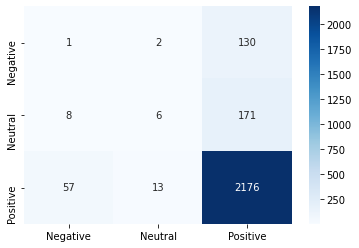

In [26]:
sns.heatmap(results_dict_no_lemma['mnb']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

While the overall score is great, the actual accuracy is not. Due to the imbalance in classes, the model has trouble predicting neutral and negative reviews. It just happens to be that there are so many positive reviews that the score is still "good".

I feel like this will be the typical trend for all my models.

### Random Forest

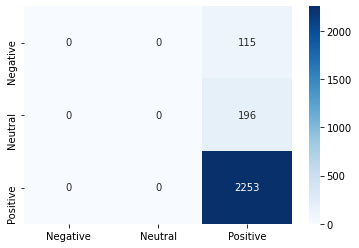

In [6]:
sns.heatmap(results_dict_no_lemma['rf']['acc'],
            cmap='Blues',
            cbar='False',
            annot=True,
            fmt='g',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

So Random Forest wasn't able to classify any of the neutral or negative reviews, but was able to classify every positive review. I think this is only attributed to the model only picking positive, because if it was good at classifying positive reviews, then would it still classify negative and neutral as positive reviews?

